загрузим датасет с кагл

In [1]:
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/yasserh/titanic-dataset/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saintsjane
Your Kaggle Key: ··········


100%|██████████| 22.0k/22.0k [00:00<00:00, 8.00MB/s]

In [3]:
import pandas as pd
train = pd.read_csv('/content/titanic-dataset/Titanic-Dataset.csv',index_col=0)
train.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
train.tail(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
print(train.columns)
print(" ".join(train.columns))

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked


In [8]:
train.columns = [col.lower().replace(' ','') for col in train.columns]
print(*train.columns,sep = ', ')

survived, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Как мы видим, у нас 12 переменных. Одна из них (Survived) — зависимая (целевая), остальные — независимые (признаки). Всего в датасете 891 запись, при этом в нескольких переменных есть пропуски.

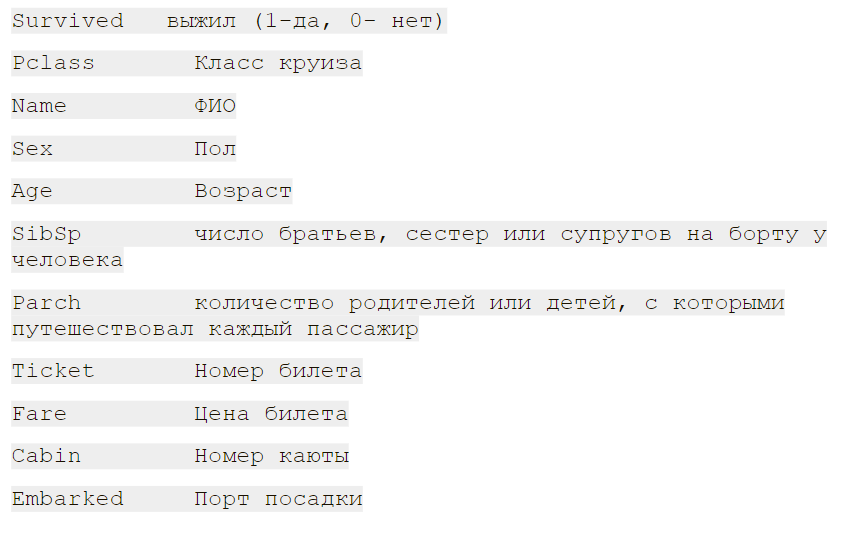

Проверим путсые ячейки в датасете

In [11]:
train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [12]:
train.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Больше всего пропущенных значений в переменной Cabin. Они также есть в переменных Age и Embarked.
переменная Cabin (номер каюты), скорее всего, не является самой важной избавимся от нее

In [14]:
del train['cabin']

In [15]:
train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
embarked      2
dtype: int64

а вот Age (возраст) точно важен, заменим пустые значения средним арифметическим

In [16]:
train['age'].fillna(train['age'].mean(), inplace = True)

In [17]:
train.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    2
dtype: int64

у нас остаются две пустые строки в Embarked, удалим их

In [18]:
train.dropna(inplace = True)

In [20]:
train.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [21]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


модель не сможет подобрать веса, если значения выражены словами (например, male и female в переменной Sex или C, Q, S в переменной Embarked)

In [23]:
pd.get_dummies(train['sex']).head(10)


,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


информация избыточна оставим 1 стоблец

In [27]:
sexnew = pd.get_dummies(train['sex'], drop_first = True)
sexnew.head(10)

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,0


Сделаем то же самое для переменных Pclass и Embarked.

In [28]:
embarkednew = pd.get_dummies(train['embarked'], drop_first = True)
pclassnew = pd.get_dummies(train['pclass'], drop_first = True)

Присоединим новые (закодированные) переменные к исходному датафрейму train

In [29]:
train = pd.concat([train, pclassnew, sexnew, embarkednew], axis = 1)

In [30]:
train.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,2,3,male,Q,S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,1,0,1
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,0,1,1,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,0,0,1,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,0,1,1,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0,1,0,0,1


удалим исходные  переменные Sex, Pclass и Embarked
Кроме того, переменные  Name и Ticket вряд ли скажут что-то определенное о шансах на выживание пассажира, удалим и их

In [33]:
train.drop([ 'pclass', 'name', 'sex', 'ticket', 'embarked'], axis = 1, inplace = True)
train.head(10)

,survived,age,sibsp,parch,fare,2,3,male,Q,S
PassengerId,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,1,1,0,1
2,1,38.000000,1,0,71.2833,0,0,0,0,0
3,1,26.000000,0,0,7.9250,0,1,0,0,1
4,1,35.000000,1,0,53.1000,0,0,0,0,1
5,0,35.000000,0,0,8.0500,0,1,1,0,1
6,0,29.699118,0,0,8.4583,0,1,1,1,0
7,0,54.000000,0,0,51.8625,0,0,1,0,1
8,0,2.000000,3,1,21.0750,0,1,1,0,1
9,1,27.000000,0,2,11.1333,0,1,0,0,1


In [37]:
category_int = train.select_dtypes(include=['int64','float64'])
category_int_names = category_int.columns.tolist()
print(f'интервальные столбцы: {category_int_names}\n')

for col in category_int_names:
    print(f'информация о столбце {col}:')
    print(f'среднее: {category_int[col].mean()}')
    print(f'максимум: {category_int[col].max()}')
    print(f'минимум: {category_int[col].min()}')
    print(f'количество уникальных значений: {category_int[col].nunique()}')

интервальные столбцы: ['survived', 'age', 'sibsp', 'parch', 'fare']

информация о столбце survived:
среднее: 0.38245219347581555
максимум: 1
минимум: 0
количество уникальных значений: 2
информация о столбце age:
среднее: 29.65344637067425
максимум: 80.0
минимум: 0.42
количество уникальных значений: 89
информация о столбце sibsp:
среднее: 0.5241844769403825
максимум: 8
минимум: 0
количество уникальных значений: 7
информация о столбце parch:
среднее: 0.38245219347581555
максимум: 6
минимум: 0
количество уникальных значений: 7
информация о столбце fare:
среднее: 32.09668087739032
максимум: 512.3292
минимум: 0.0
количество уникальных значений: 247


In [38]:
train.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9], include=['int64','float64'])

,survived,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.653446,0.524184,0.382452,32.096681
std,0.486260,12.968366,1.103705,0.806761,49.697504
min,0.000000,0.420000,0.000000,0.000000,0.000000
10%,0.000000,16.000000,0.000000,0.000000,7.550000
25%,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
90%,1.000000,47.000000,1.000000,2.000000,77.287500
max,1.000000,80.000000,8.000000,6.000000,512.329200


посчитаем процент выживших

In [39]:
print(train['survived'].sum()/len(train))

0.38245219347581555


посчитаем число выживших мужчин и женщин

In [53]:

males_total = len(train.loc[(train['male'] == 1)])
females_total = len(train.loc[(train['male'] == 0)])
males_survived = len(train.loc[((train['male'] == 1) & (train['survived'] == 1))])
females_survived = len(train.loc[((train['male'] == 0) & (train['survived'] == 1))])

print(f'выжило мужчин {males_survived}')
print(f'выжило женщин {females_survived}')
print(f'погибло мужчин {males_total-males_survived}')
print(f'погиблоло женщин {females_total-females_survived}')



выжило мужчин 109
выжило женщин 231
погибло мужчин 468
погиблоло женщин 81


посчитаем число выживших взависимости от возраста

In [56]:
kids_total = len(train.loc[(train['age'] <= 15)])
yang_total = len(train.loc[(train['age'] > 15) & (train['age'] <= 30)])
adult_total = len(train.loc[(train['age']) > 30 & (train['age'] <= 60)])
old_total = len(train.loc[(train['age'] > 60 )])
kids_survived = len(train.loc[((train['age'] <= 15) & (train['survived'] == 1))])
yang_survived = len(train.loc[((train['age'] > 15) & (train['age'] <= 30) & (train['survived'] == 1))])
adult_survived = len(train.loc[((train['age']) > 30 & (train['age'] <= 60) & (train['survived'] == 1))])
old_survived = len(train.loc[((train['age'] > 60) & (train['survived'] == 1))])

print(f'выжило детей {kids_survived}')
print(f'выжило молодежи {yang_survived}')
print(f'выжило взрослых {adult_survived}')
print(f'выжило пожилых {females_survived}')
print(f'погибло детей {kids_total-kids_survived}')
print(f'погиблоло молодежи {yang_total-yang_survived}')
print(f'погибло взрослых  {adult_total-adult_survived}')
print(f'погиблоло пожилых {old_total-old_survived}')

выжило детей 49
выжило молодежи 169
выжило взрослых 889
выжило пожилых 231
погибло детей 34
погиблоло молодежи 334
погибло взрослых  0
погиблоло пожилых 17


посчитаем число выживших взависимости от класса

In [62]:
total1 = len(train.loc[(train[2] == 0)& (train[3] == 0)])
total2 = len(train.loc[(train[2] == 1)& (train[3] == 0)])
total3 = len(train.loc[(train[2] == 0)& (train[3] == 1)])
total1_survived = len(train.loc[((train[2] == 0)& (train[3] == 0) & (train['survived'] == 1))])
total2_survived = len(train.loc[((train[2] == 1)& (train[3] == 0) & (train['survived'] == 1))])
total3_survived = len(train.loc[((train[2] == 0)& (train[3] == 1) & (train['survived'] == 1))])


print(f'выжило в 1 классе {total1_survived}')
print(f'выжило во 2 классе {total2_survived}')
print(f'выжило в 3 классе {total2_survived}')
print(f'погибло в 1 классе  {total1-total1_survived}')
print(f'погибло во 2 классе  {total2-total2_survived}')
print(f'погибло в 3 классе  {total3-total3_survived}')


выжило в 1 классе 134
выжило во 2 классе 87
выжило в 3 классе 87
погибло в 1 классе  80
погибло во 2 классе  97
погибло в 3 классе  372


посчитаем число выживших взависимости от того были они одни или родственниками

In [63]:
one_total = len(train.loc[(train['sibsp'] == 0)])
family_total = len(train.loc[(train['sibsp'] > 0)])
one_survived = len(train.loc[((train['sibsp'] == 0) & (train['survived'] == 1))])
family_survived = len(train.loc[((train['sibsp'] > 0) & (train['survived'] == 1))])

print(f'выжило одиноких {one_survived}')
print(f'выжило с родственниками {family_survived}')
print(f'погибло одиноких {one_total-one_survived}')
print(f'погиблоло с родственниками {family_total-family_survived}')

выжило одиноких 208
выжило с родственниками 132
погибло одиноких 398
погиблоло с родственниками 151


посчитаем число выживших взависимости от того были они одни и с детьми или родителями

In [64]:
no_total = len(train.loc[(train['parch'] == 0)])
yes_total = len(train.loc[(train['parch'] > 0)])
no_survived = len(train.loc[((train['parch'] == 0) & (train['survived'] == 1))])
yes_survived = len(train.loc[((train['parch'] > 0) & (train['survived'] == 1))])

print(f'выжило одиноких {no_survived}')
print(f'выжило с родственниками {yes_survived}')
print(f'погибло одиноких {no_total-no_survived}')
print(f'погиблоло с родственниками {yes_total-yes_survived}')

выжило одиноких 231
выжило с родственниками 109
погибло одиноких 445
погиблоло с родственниками 104


посчитаем число выживших взависимости от порта посадки

In [66]:
totalC = len(train.loc[(train['Q'] == 0)& (train['S'] == 0)])
totalQ = len(train.loc[(train['Q'] == 1)& (train['S'] == 0)])
totalS = len(train.loc[(train['Q'] == 0)& (train['S'] == 1)])
totalC_survived = len(train.loc[((train['Q'] == 0)& (train['S'] == 0) & (train['survived'] == 1))])
totalQ_survived = len(train.loc[((train['Q'] == 1)& (train['S'] == 0) & (train['survived'] == 1))])
totalS_survived = len(train.loc[((train['Q'] == 0)& (train['S'] == 1) & (train['survived'] == 1))])

print(f'выжило C {totalC_survived}')
print(f'выжило Q {totalQ_survived}')
print(f'выжило S {totalS_survived}')
print(f'погибло C  {totalC-totalC_survived}')
print(f'погибло Q  {totalQ-totalQ_survived}')
print(f'погибло S {totalS-totalS_survived}')


выжило C 93
выжило Q 30
выжило S 217
погибло C  75
погибло Q  47
погибло S 427


In [102]:
data = [
    [yes_survived/yes_total*100, yes_survived/yes_total*100<50],
    [no_survived/no_total*100, no_survived/no_total*100<50],
    [one_survived/one_total*100, one_survived/one_total*100<50],
    [family_survived/family_total*100, family_survived/family_total*100<50],
    [kids_survived/kids_total*100, kids_survived/kids_total*100<50],
    [yang_survived/yang_total*100, yang_survived/yang_total*100<50],
    [adult_survived/adult_total*100, adult_survived/adult_total*100<50],
    [old_survived/old_total*100, old_survived/old_total*100<50],
    [males_survived/males_total*100, males_survived/males_total*100<50],
    [females_survived/females_total*100, females_survived/females_total*100<50],
    [total1_survived/total1*100, total1_survived/total1*100<50],
    [total2_survived/total2*100, total2_survived/total2*100<50],
    [total3_survived/total3*100, total3_survived/total3*100<50],
    [totalC_survived/totalC*100, totalC_survived/totalC*100<50],
    [totalQ_survived/totalQ*100, totalQ_survived/totalQ*100<50],
     [totalS_survived/totalS*100, totalS_survived/totalS*100<50]
    ]

df = pd.DataFrame(data, columns=["процент выживших", "отрицательное влияние на выживаемость"],index=["наличие у пассажира детей/родителей","отсутствие у пассажира детей/родителей","наличие у пассажира родственников","отсутствие у пассажира родственников","пассажир ребенок","пассажир молодой","пассажир взрослый","пассажир пожилой","пассажир женщина","пассажир мужчина","1 класс","2 класс","3 класс","порт С", "порт Q", "порт S"])
df

,процент выживших,отрицательное влияние на выживаемость
наличие у пассажира детей/родителей,51.173709,False
отсутствие у пассажира детей/родителей,34.171598,True
наличие у пассажира родственников,34.323432,True
отсутствие у пассажира родственников,46.643110,True
пассажир ребенок,59.036145,False
пассажир молодой,33.598410,True
пассажир взрослый,100.000000,False
пассажир пожилой,19.047619,True
пассажир женщина,18.890815,True
пассажир мужчина,74.038462,False


In [104]:
category_int = train.select_dtypes(include=['int64','float64'])
category_int_names = category_int.columns.tolist()
print(f' столбцы: {category_int_names}\n')

for col in category_int_names:
    print(f'информация о столбце {col}:')
    print(f'максимум: {category_int[col].max()}')
    print(f'минимум: {category_int[col].min()}')
    print(f'количество уникальных значений: {category_int[col].nunique()}')

 столбцы: ['survived', 'age', 'sibsp', 'parch', 'fare']

информация о столбце survived:
максимум: 1
минимум: 0
количество уникальных значений: 2
информация о столбце age:
максимум: 80.0
минимум: 0.42
количество уникальных значений: 89
информация о столбце sibsp:
максимум: 8
минимум: 0
количество уникальных значений: 7
информация о столбце parch:
максимум: 6
минимум: 0
количество уникальных значений: 7
информация о столбце fare:
максимум: 512.3292
минимум: 0.0
количество уникальных значений: 247
